# English word study

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# Data source: https://github.com/dwyl/english-words
df = pd.read_csv('words_alpha.txt', delimiter = "\t")
print(df.shape)

(370104, 1)


## Data Cleaning

In [57]:
# Find null values
rows_with_null = df.isna().any(axis=1)
print(df[rows_with_null])

          a
196709  NaN
209463  NaN


In [58]:
# Remove rows with null values
df = df.dropna(how='all')
print(df.shape)
print(df)

(370102, 1)
                   a
0                 aa
1                aaa
2                aah
3              aahed
4             aahing
...              ...
370099  zwinglianism
370100  zwinglianist
370101       zwitter
370102    zwitterion
370103  zwitterionic

[370102 rows x 1 columns]


In [59]:
# When the data frame was imported, the first row was interpreted as a header. Change the column name.
df.rename(columns={'a': 'word'}, inplace=True)
print(df)

                word
0                 aa
1                aaa
2                aah
3              aahed
4             aahing
...              ...
370099  zwinglianism
370100  zwinglianist
370101       zwitter
370102    zwitterion
370103  zwitterionic

[370102 rows x 1 columns]


In [60]:
# Also, the first word ("a") needs to be replaced at the top of the data frame
top_row = {'word': 'a'}
df = pd.concat([pd.DataFrame(top_row, index=[0]), df], ignore_index=True)
print(df)

                word
0                  a
1                 aa
2                aaa
3                aah
4              aahed
...              ...
370098  zwinglianism
370099  zwinglianist
370100       zwitter
370101    zwitterion
370102  zwitterionic

[370103 rows x 1 columns]


In [108]:
# Check for duplicates
sum(df['word'].duplicated())

0

## Count number of characters and number of unique letters

In [61]:
# New column that counts the total number of characters
df['char_count'] = df['word'].str.len()
df

,word,char_count
0,a,1
1,aa,2
2,aaa,3
3,aah,3
4,aahed,5
...,...,...
370098,zwinglianism,12
370099,zwinglianist,12
370100,zwitter,7
370101,zwitterion,10


In [62]:
# Function to count unique characters in a string
def count_unique_chars(x):
    return len(set(x))

In [63]:
df['char_count_unique'] = df['word'].apply(count_unique_chars)
df

,word,char_count,char_count_unique
0,a,1,1
1,aa,2,1
2,aaa,3,1
3,aah,3,2
4,aahed,5,4
...,...,...,...
370098,zwinglianism,12,9
370099,zwinglianist,12,9
370100,zwitter,7,6
370101,zwitterion,10,8


## Analyzing the lengths of words

In [109]:
# Describe the distribution of word lengths
# Mean: 9.44 letters
# Median: 9 letters
# Max: 31 letters
df['char_count'].describe()

count    370103.000000
mean          9.442507
std           2.916429
min           1.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          31.000000
Name: char_count, dtype: float64

In [65]:
# Find the word(s) with 31 characters
max_char_filter = df['char_count'].idxmax()
row_with_max_char_value = df.loc[max_char_filter]
print(row_with_max_char_value)

word                 dichlorodiphenyltrichloroethane
char_count                                        31
char_count_unique                                 13
Name: 84793, dtype: object


<Axes: >

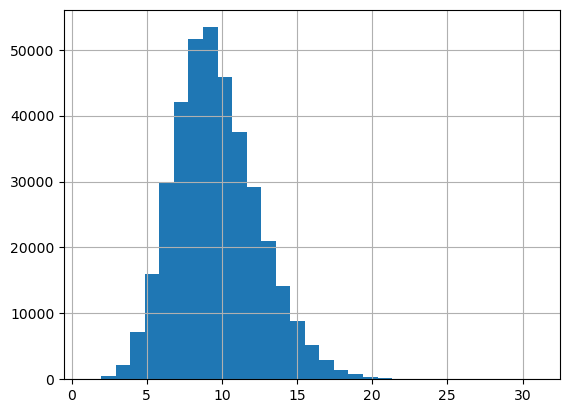

In [110]:
# Create a histogram of number of words based on length
df['char_count'].hist(bins=31)

In [111]:
# Get a count of the number of words by length
df_char_count = df['char_count'].value_counts().reset_index()
df_char_count

,char_count,count
0,9,53402
1,8,51627
2,10,45872
3,7,41998
4,11,37539
5,6,29874
6,12,29125
7,13,20944
8,5,15920
9,14,14149


In [113]:
# Sort by length (char_count) and set the index to be char_count
df_char_count_sort = df_char_count.sort_values(by='char_count')
df_char_count_sort.set_index('char_count', inplace=True)
df_char_count_sort

,count
char_count,
1,26
2,427
3,2129
4,7185
5,15920
6,29874
7,41998
8,51627
9,53402


Text(0.5, 1.0, 'Distribution of English words by length')

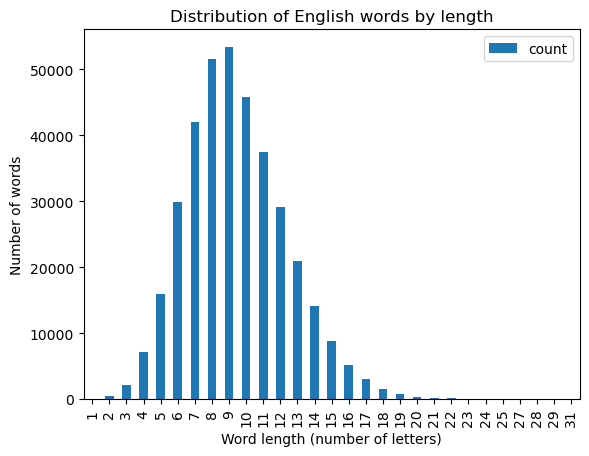

In [114]:
# Create a bar chart
word_chart = df_char_count_sort.plot(kind='bar', legend='False')
word_chart.set_xlabel('Word length (number of letters)') 
word_chart.set_ylabel('Number of words')     
word_chart.set_title('Distribution of English words by length') 

In [115]:
# Create columns for running total and percentile (this confirms the median as 9 letters)
df_char_count_sort['running_total'] = df_char_count_sort['count'].cumsum()
df_char_count_sort['percentile'] = (df_char_count_sort['running_total'] / 370103)
df_char_count_sort

,count,running_total,percentile
char_count,,,
1,26,26,0.000070
2,427,453,0.001224
3,2129,2582,0.006976
4,7185,9767,0.026390
5,15920,25687,0.069405
6,29874,55561,0.150123
7,41998,97559,0.263600
8,51627,149186,0.403093
9,53402,202588,0.547383


In [71]:
# What about antidisestablishmentarianism?
antidisestablishmentarianism = (df['word'] == 'antidisestablishmentarianism')
df[antidisestablishmentarianism]

,word,char_count,char_count_unique
15119,antidisestablishmentarianism,28,12


In [72]:
# Which words are as long or longer?
longest_words = (df['char_count'] >= 28)
df[longest_words]

,word,char_count,char_count_unique
15119,antidisestablishmentarianism,28,12
57279,cyclotrimethylenetrinitramine,29,12
84793,dichlorodiphenyltrichloroethane,31,13
139037,hydroxydehydrocorticosterone,28,12
330156,trinitrophenylmethylnitramine,29,12


In [74]:
twenty_or_longer = (df['char_count'] >= 22)
df[twenty_or_longer]

,word,char_count,char_count_unique
8501,alkylbenzenesulfonates,22,13
12088,anatomicophysiological,22,13
14621,anthropomorphologically,23,13
15118,antidisestablishmentarian,25,12
15119,antidisestablishmentarianism,28,12
...,...,...,...
329757,trifluorochloromethane,22,13
330156,trinitrophenylmethylnitramine,29,12
334008,ultranationalistically,22,11
355509,ureterocystanastomosis,22,12


## Analyzing the number of unique letters in words

In [99]:
# Describe the distribution of word length by number of unique characters
# Mean: 7.47 letters
# Median: 7 letters
df['char_count_unique'].describe()

count    370103.000000
mean          7.470404
std           1.932449
min           1.000000
25%           6.000000
50%           7.000000
75%           9.000000
max          16.000000
Name: char_count_unique, dtype: float64

In [116]:
# Count the number of words that contain a particular number of unique letters
df_char_count_unique = df['char_count_unique'].value_counts().reset_index()
df_char_count_unique_sort = df_char_count_unique.sort_values(by='char_count_unique')  # Sort by char_count_unique
df_char_count_unique_sort.set_index('char_count_unique', inplace=True)  # Create a new index using char_count_unique
df_char_count_unique_sort

,count
char_count_unique,
1,44
2,747
3,4458
4,15433
5,36100
6,60122
7,74265
8,70431
9,53537


Text(0.5, 1.0, 'Distribution of English words by number of unique letters')

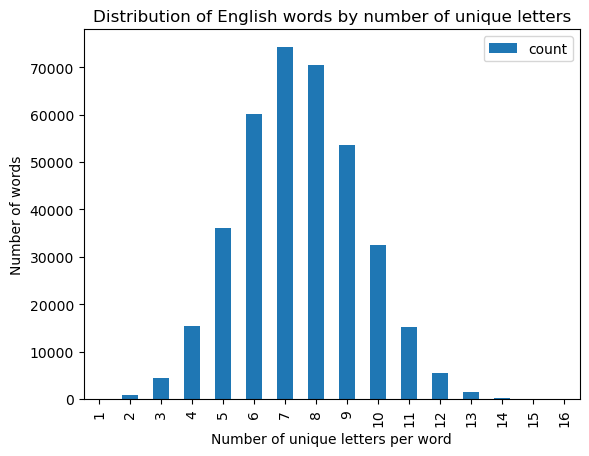

In [117]:
# Create a bar chart
word_chart_unique = df_char_count_unique_sort.plot(kind='bar', legend='False')
word_chart_unique.set_xlabel('Number of unique letters per word') 
word_chart_unique.set_ylabel('Number of words')     
word_chart_unique.set_title('Distribution of English words by number of unique letters') 

In [119]:
unique_16 = (df['char_count_unique'] == 16)
df[unique_16]

,word,char_count,char_count_unique
36110,blepharoconjunctivitis,22,16
117351,formaldehydesulphoxylic,23,16
240878,pneumoventriculography,22,16
254841,pseudolamellibranchiata,23,16
254842,pseudolamellibranchiate,23,16
311297,superacknowledgment,19,16
